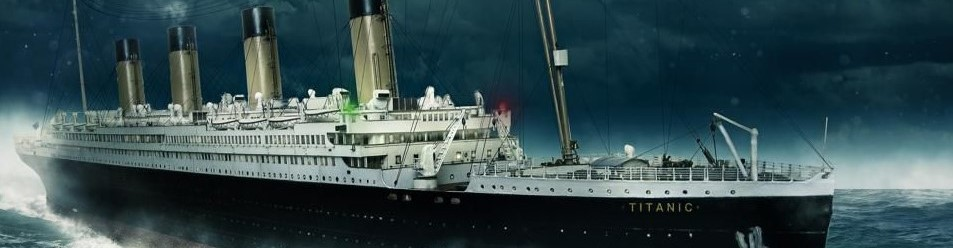

# Titanic Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Let's Check unique value in each column.
for i in data.columns:
    print('Unique Values in ' + i + ' column: ' + str(len(data[i].unique())))

Unique Values in PassengerId column: 891
Unique Values in Survived column: 2
Unique Values in Pclass column: 3
Unique Values in Name column: 891
Unique Values in Sex column: 2
Unique Values in Age column: 89
Unique Values in SibSp column: 7
Unique Values in Parch column: 7
Unique Values in Ticket column: 681
Unique Values in Fare column: 248
Unique Values in Cabin column: 148
Unique Values in Embarked column: 4


In [5]:
# Passenger ID is a serial no., so we can safely drop this column.
data.drop('PassengerId',axis = 1, inplace= True)

In [6]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Every name contain some Mr, Mrs, Miss or Master as prefix, so we can use the name column to categorize everyone in one 
of these group. After classification, we found out some names do not include any of these prefix, but we notice that instead of these prefix they contain some professional terms like Dr., Captain. So we decide tho froup them in Mr or Mrs based on their sex.

In [7]:
data['Category'] = data['Name']
for i in range(len(data.Name)):
    if 'Mr' in data.Name[i]:
        data['Category'][i] = 'Mr'
    elif 'Mrs' in data.Name[i]:
        data['Category'][i] = 'Mrs'
    elif 'Miss' in data.Name[i]:
        data['Category'][i] = 'Miss'
    elif 'Master' in data.Name[i]:
        data['Category'][i] = 'Master';
    elif data['Sex'][i] == 'male':
        data['Category'][i] = 'Mr'
    elif data['Sex'][i] == 'female':
        data['Category'][i] = 'Mrs'

<ipython-input-7-45e0076c1057>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'][i] = 'Mr'
<ipython-input-7-45e0076c1057>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'][i] = 'Miss'
<ipython-input-7-45e0076c1057>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'][i] = 'Master';
<ipython-input-7-45e0076c1057>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [9]:
data['Category'].unique()

array(['Mr', 'Miss', 'Master', 'Mrs'], dtype=object)

In [10]:
# Name will not provide any help to our madel, so we drop the Name column.
data.drop('Name', axis = 1, inplace = True)

In [11]:
len(data.Ticket.unique())

681

In [12]:
# Ticket will not provide us any information, So it would be better to drop it.
data.drop('Ticket', axis =1, inplace= True)

In [14]:
# Sex is a Categorical variable, so it would be better to convert in numbers.
data['Sex'] = data['Sex'].map({'male': 0, 'female' :1})

In [16]:
print('Unique Values in Cabin Column: ' + str(len(data.Cabin.unique())))
print('Null Values in Cabin Column: ' + str(data.Cabin.isnull().sum()))
print('Percentage of null Values in Cabin Column: ' + str((data.Cabin.isnull().sum() * 100)/len(data.Cabin))[:5] + '%')

Unique Values in Cabin Column: 148
Null Values in Cabin Column: 687
Percentage of null Values in Cabin Column: 77.10%


In [17]:
# Cabin columns have huge number of missing values, also it does not give us any vital information. So, we should drop this column.
data.drop('Cabin',axis =1 , inplace= True)

In [18]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mr
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mr
4,0,3,0,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Mr
887,1,1,1,19.0,0,0,30.0000,S,Miss
888,0,3,1,NaN,1,2,23.4500,S,Miss
889,1,1,0,26.0,0,0,30.0000,C,Mr


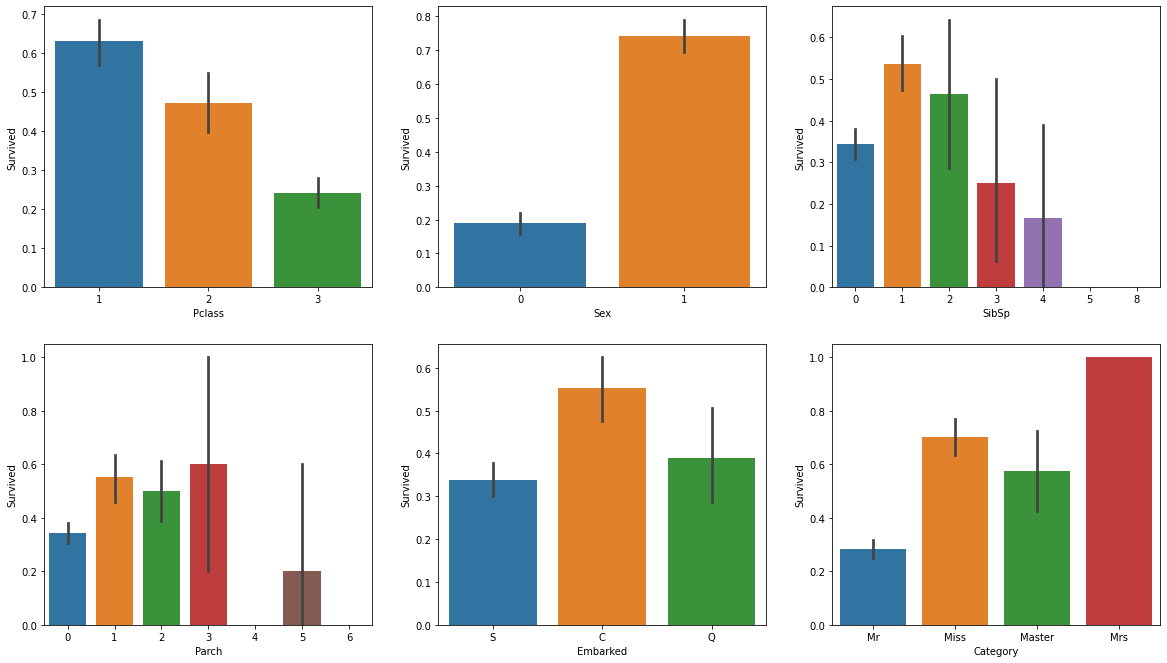

In [19]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in data.columns.drop(['Survived','Age','Fare']):
    plt.subplot(5,3,plotnumber)
    sns.barplot(x = str(i) , y = 'Survived', data = data)
    plotnumber += 1

The above graph show us the ratio of survival of each class in each column.

In [20]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


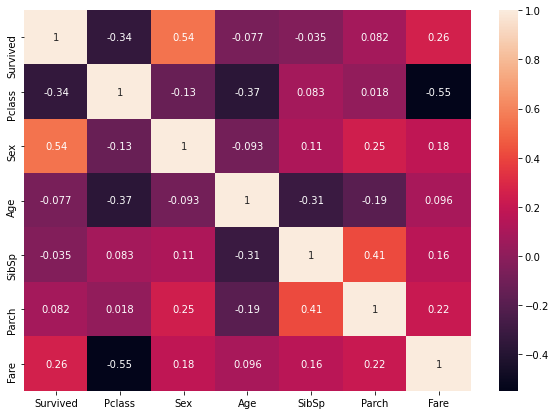

In [21]:
# The heatmap gives us the visual representation of correlation between variables.
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot= True);

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [23]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Category      0
dtype: int64

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


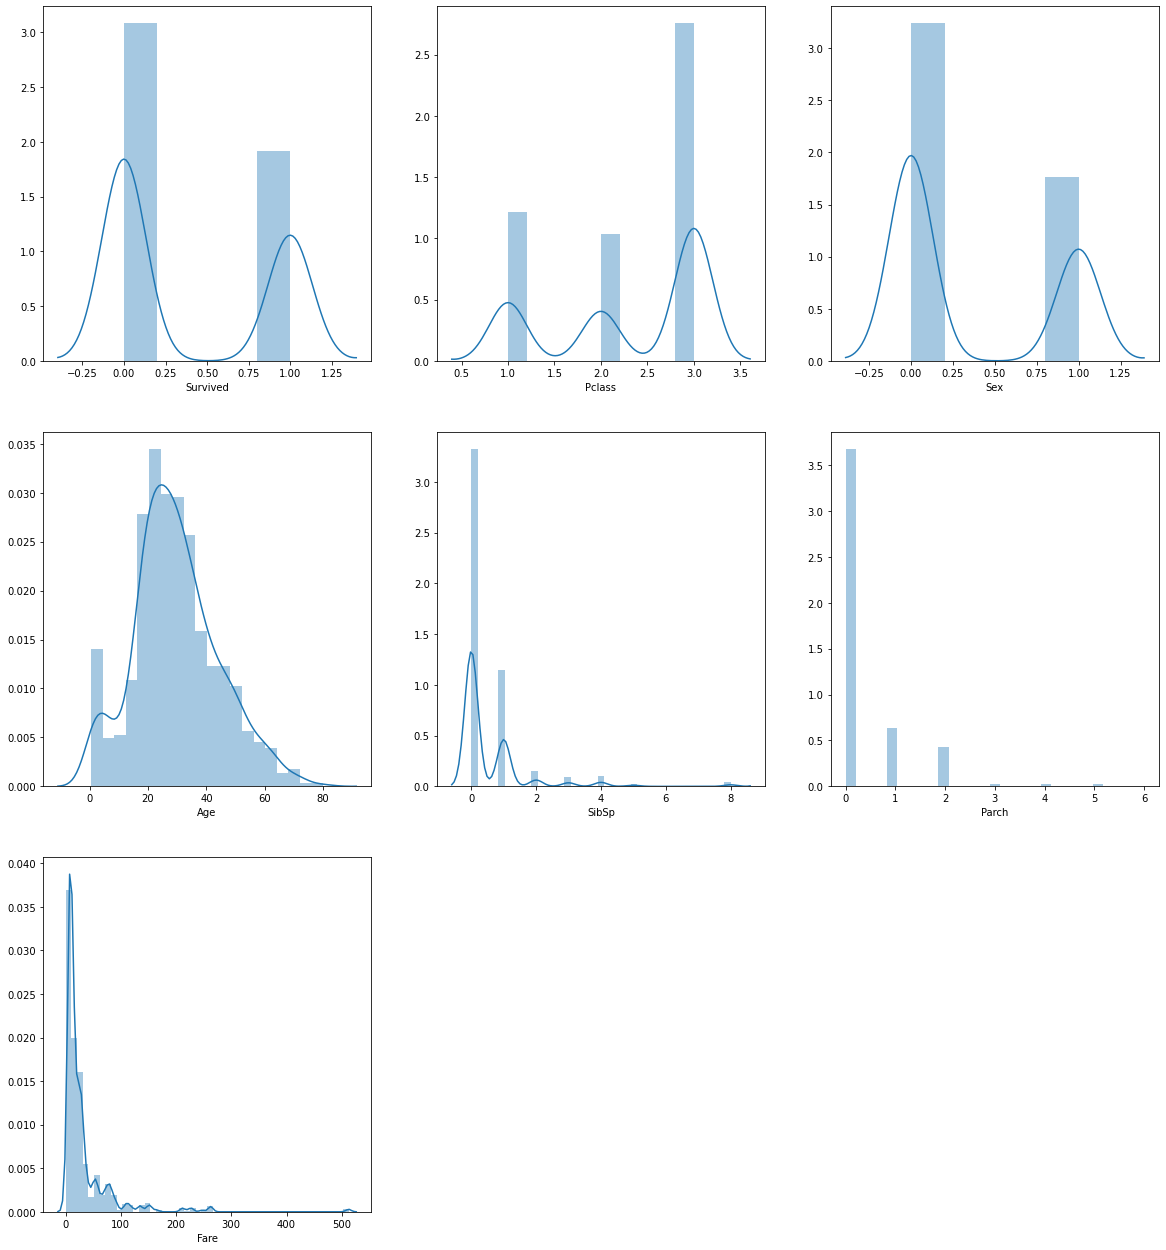

In [24]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in data.drop(['Embarked','Category'], axis =1):
    plt.subplot(4,3,plotnumber)
    sns.distplot(data[str(i)])
    plotnumber += 1

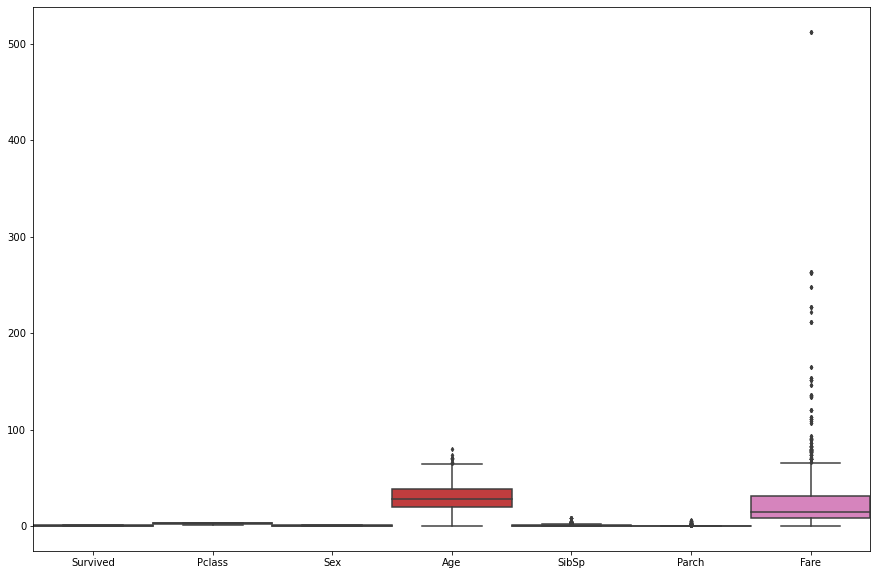

In [25]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 1,ax = ax, fliersize= 3)

In [26]:
# There are large no. of outliers in the Fare column and Age Column. 
# 1. Age Column (3 sigma rule as age column is somewhat like Gaussian Distribbution)
z = data.Age.mean() + 3 * data.Age.std()
data[data.Age > z]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
630,1,1,0,80.0,0,0,30.000,S,Mr
851,0,3,0,74.0,0,0,7.775,S,Mr


There are not much oiutliers in The age column, we can leave them unhandled

In [27]:
# 2. Fare Column (There are some Extreme outliers, we try to remove them only)
IQR = data.Fare.quantile(.75) - data.Fare.quantile(0.25)
ext = data.Fare.median() + 3 * IQR
data.Fare.replace(list(data[data.Fare > ext].Fare),ext, inplace= True)

Now, we shall deal with missing rows.

In [28]:
data.iloc[np.where(data['Embarked'].isnull() == True)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
61,1,1,1,38.0,0,0,80.0,NaN,Miss
829,1,1,1,62.0,0,0,80.0,NaN,Mr


In The above rows, the Fair paid is quite high, It may be due to their Pclass or either they have boarded from distant platform.

In [29]:
data.groupby('Embarked').Fare.median()

Embarked
C    29.70
Q     7.75
S    13.00
Name: Fare, dtype: float64

In [30]:
data.groupby('Embarked').Fare.median()

Embarked
C    29.70
Q     7.75
S    13.00
Name: Fare, dtype: float64

In [31]:
data.groupby('Embarked').Pclass.median()

Embarked
C    1
Q    3
S    3
Name: Pclass, dtype: int64

Since Embarked denotes the platform, from where the passenger has boarded. Therfore, it's value highly depend on Fare and Pclass. From above findings, it is clear that passenger was from C embarked.

In [32]:
data.Embarked.fillna('C', inplace= True)

In Category and Embarked column, there are values which can't be ranked, so we use one hot encoder to make seperate columns for them.

In [33]:
z1 = pd.get_dummies(data.Category, prefix = 'Category')
z1.drop('Category_Mr', axis =1, inplace = True)
z2 = pd.get_dummies(data.Embarked, prefix = 'Embarked', drop_first= True)

In [34]:
data = data.join(z1)
data = data.join(z2)

In [35]:
data.drop('Embarked', axis = 1, inplace = True)

In [36]:
# Converting Category column values in ordinal values
data.Category = data['Category'].map({'Mr':1,'Master':2,'Miss':3, 'Mrs':4})

In [37]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Category,Category_Master,Category_Miss,Category_Mrs,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,3,0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1,0,0,0,0,1
887,1,1,1,19.0,0,0,30.0000,3,0,1,0,0,1
888,0,3,1,NaN,1,2,23.4500,3,0,1,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0,0,0,0


In [38]:
data.corrwith(data.Age)

Survived          -0.077221
Pclass            -0.369226
Sex               -0.093254
Age                1.000000
SibSp             -0.308247
Parch             -0.189119
Fare               0.150739
Category          -0.365471
Category_Master   -0.398827
Category_Miss     -0.274275
Category_Mrs       0.010997
Embarked_Q        -0.022405
Embarked_S        -0.032523
dtype: float64

Age have the highest correlation with Passenger class and Category class. We create a new column which mark teenager ( i.e Miss and Master) as 1 and adults (Mr. and Mrs.) as 2. 

In [39]:
data['new_cate'] = data['Category'].map({1:5,2:6,3:7,4:8})
data['new_cate'] = data['new_cate'].map({5:2,7:1,6:1,8:2})

In [40]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Category,Category_Master,Category_Miss,Category_Mrs,Embarked_Q,Embarked_S,new_cate
0,0,3,0,22.0,1,0,7.2500,1,0,0,0,0,1,2
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,2
2,1,3,1,26.0,0,0,7.9250,3,0,1,0,0,1,1
3,1,1,1,35.0,1,0,53.1000,1,0,0,0,0,1,2
4,0,3,0,35.0,0,0,8.0500,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1,0,0,0,0,1,2
887,1,1,1,19.0,0,0,30.0000,3,0,1,0,0,1,1
888,0,3,1,NaN,1,2,23.4500,3,0,1,0,0,1,1
889,1,1,0,26.0,0,0,30.0000,1,0,0,0,0,0,2


In [41]:
data.corrwith(data.Age)

Survived          -0.077221
Pclass            -0.369226
Sex               -0.093254
Age                1.000000
SibSp             -0.308247
Parch             -0.189119
Fare               0.150739
Category          -0.365471
Category_Master   -0.398827
Category_Miss     -0.274275
Category_Mrs       0.010997
Embarked_Q        -0.022405
Embarked_S        -0.032523
new_cate           0.454429
dtype: float64

In [42]:
# Since Age group contains some outliers, Its better to use median than mean
data.groupby('new_cate').Age.median()

new_cate
1    18.0
2    31.0
Name: Age, dtype: float64

In [43]:
data.isnull().sum()

Survived             0
Pclass               0
Sex                  0
Age                177
SibSp                0
Parch                0
Fare                 0
Category             0
Category_Master      0
Category_Miss        0
Category_Mrs         0
Embarked_Q           0
Embarked_S           0
new_cate             0
dtype: int64

In [44]:
m1 = data.loc[data.new_cate == 1]
m2 = data.loc[data.new_cate == 2]

In [45]:
m1.Age.fillna(m1.Age.median(), inplace = True)
m2.Age.fillna(m2.Age.median(), inplace = True)

C:\Users\Aman\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [46]:
data = pd.concat([m1,m2])
data = data.sort_index()

In [47]:
data.drop(['new_cate','Category'], axis =1 , inplace= True)

In [48]:
data.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Category_Master    0
Category_Miss      0
Category_Mrs       0
Embarked_Q         0
Embarked_S         0
dtype: int64

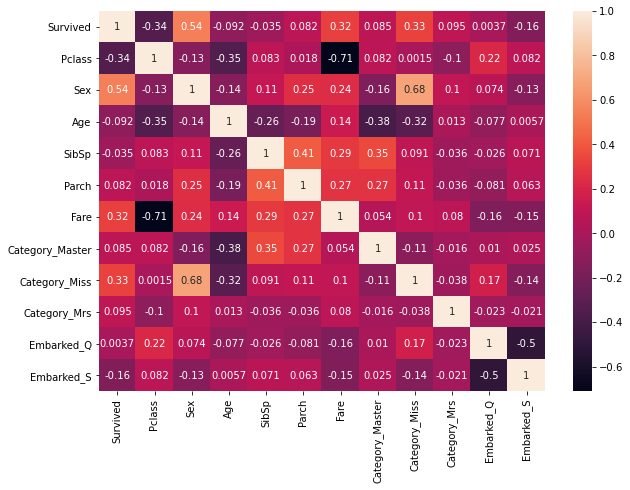

In [49]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot= True)

In [50]:
# Since Fare have a very High Correlation with PClass, it is safe to drop Fare column, as it doesn't benefit our model,
# instead it will leads to multicollinearity and also make our madel heavy.
data.drop('Fare', axis =1 , inplace = True) 

In [51]:
# Now we are ready with our cleaned dataset.

In [52]:
X = data.drop(['Survived'], axis =1)
Y = data['Survived']

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.25, random_state = 35)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [111]:
X_scaled = scalar.fit_transform(X)

# Logistic Regression

In [74]:
from sklearn.linear_model  import LogisticRegression
# create model
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.8202247191011236

In [75]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.828 (0.041)


In [76]:
from scipy.stats import uniform
parameter = {'C' : uniform(loc = 0,scale =4), 'penalty' : ['l1','l2','elasticnet']}

from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=1000)
rand_search.fit(x_train,y_train)
model = LogisticRegression(C = rand_search.best_params_['C'],penalty = rand_search.best_params_['penalty'],solver = 'liblinear' )
model.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4693 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 4985 out of 5000 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    5.1s finished


LogisticRegression(C=0.4021462483032625, solver='liblinear')

In [77]:
print(model.score(x_test,y_test))

0.8202247191011236


In [78]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.828 (0.041)


# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
# create model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7752808988764045

In [80]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.797 (0.029)


In [81]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'],
    
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=10000)
rand_search.fit(x_train,y_train)
model = DecisionTreeClassifier(criterion = rand_search.best_params_['criterion'],max_depth = rand_search.best_params_['max_depth'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],splitter = rand_search.best_params_['splitter'])
model.fit(x_train,y_train)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 8640 is smaller than n_iter=10000. Running 8640 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 6640 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 22640 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 42808 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 43200 out of 43200 | elapsed:   28.0s finished


DecisionTreeClassifier(max_depth=17, min_samples_leaf=5, min_samples_split=3,
                       splitter='random')

In [82]:
print(model.score(x_test,y_test))

0.8314606741573034


In [83]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.808 (0.032)


# Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
# create model
model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8161434977578476

In [113]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.800 (0.034)


In [114]:
parameter = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=500)
rand_search.fit(x_train,y_train)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  2.1min finished


RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=90)

In [115]:
print(model.score(x_test,y_test))

0.8340807174887892


In [88]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.820 (0.026)


# XG Boost

In [89]:
from xgboost import XGBClassifier
# create model
model = XGBClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

[10:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8089887640449438

In [90]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.810 (0.032)


In [91]:
parameter={
            'learning_rate':np.arange(0,1,0.05),
            'max_depth': [1,3,5,6,7,8,9,10,12,15],
            'n_estimators':[10,50,100,200],
            'subsample' : np.arange(0.5,1.1,0.1)
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv =5, verbose =1, n_jobs=7,n_iter=500)
rand_search.fit(x_train,y_train)
model = XGBClassifier(objective = 'binary:logistic', learning_rate = rand_search.best_params_['learning_rate'],max_depth = rand_search.best_params_['max_depth'],n_estimators = rand_search.best_params_['n_estimators'],subsample = rand_search.best_params_['subsample'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=7)]: Done 358 tasks      | elapsed:   12.7s
[Parallel(n_jobs=7)]: Done 858 tasks      | elapsed:   31.0s
[Parallel(n_jobs=7)]: Done 1558 tasks      | elapsed:   59.7s
[Parallel(n_jobs=7)]: Done 2332 tasks      | elapsed:  1.5min
[Parallel(n_jobs=7)]: Done 2487 out of 2500 | elapsed:  1.6min remaining:    0.4s


[10:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=7)]: Done 2500 out of 2500 | elapsed:  1.6min finished
C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
print(model.score(x_test,y_test))

0.8539325842696629


In [93]:
rand_search.best_params_

{'subsample': 0.6, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.25}

In [94]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.824 (0.037)


# KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
# create model
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8202247191011236

In [96]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.816 (0.035)


In [97]:
parameter ={'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
            'leaf_size' : np.arange(15,35,1),
            'n_neighbors' : np.arange(1,25,1),
            'p' : [1,2],
            'weights' : ['uniform', 'distance'] 
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=15000)
rand_search.fit(x_train,y_train)
model = KNeighborsClassifier(weights = rand_search.best_params_['weights'],p = rand_search.best_params_['p'] ,algorithm = rand_search.best_params_['algorithm'],leaf_size = rand_search.best_params_['leaf_size'],n_neighbors = rand_search.best_params_['n_neighbors'])
model.fit(x_train,y_train)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 5760 is smaller than n_iter=15000. Running 5760 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 18960 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 27760 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 28800 out of 28800 | elapsed:   37.5s finished


KNeighborsClassifier(algorithm='ball_tree', leaf_size=15)

In [98]:
print(model.score(x_test,y_test))

0.8202247191011236


In [99]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.817 (0.032)


# Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6179775280898876

In [101]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.624 (0.035)


# Support Vector Classifier (SVC)

In [102]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8202247191011236

In [103]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.827 (0.032)


In [104]:
parameter={'C':[0.1,1,10,100,500,1000,1250,1500],'gamma':[1,0.1,0.01,0.001],'kernel' :  ['linear', 'rbf']}

from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=100)
rand_search.fit(x_train,y_train)
model = SVC(C = rand_search.best_params_['C'],gamma = rand_search.best_params_['gamma'],kernel = rand_search.best_params_['kernel'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.8min finished


SVC(C=1, gamma=0.1)

In [105]:
print(model.score(x_test,y_test))

0.8202247191011236


In [106]:
rand_search.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}

In [107]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.827 (0.032)


# Stacking

In [57]:
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [59]:
#XG Boost
xg = XGBClassifier(subsample= 0.7999999999999999,n_estimators = 100, max_depth = 7, learning_rate = 0.05)

In [60]:
#random Forest
rf = RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=90)

In [61]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_leaf=3,min_samples_split=8, splitter='random')

In [62]:
# Logistic Regression
lg = LogisticRegression()

In [63]:
# KNN
knn = KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=12, p=1)

In [64]:
# SVC
svc = SVC()

In [65]:
from sklearn.model_selection import train_test_split
train,val_train,test,val_test = train_test_split(scaled_data,Y,test_size=0.5, random_state= 355)
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

In [66]:
for i in [lg, dt, rf, xg, knn, svc]:
    i.fit(x_train,y_train)
    print(i, ' score: ', i.score(x_test,y_test), '\n')

LogisticRegression()  score:  0.8202247191011236 

DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_leaf=3,
                       min_samples_split=8, splitter='random')  score:  0.8202247191011236 

RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=90)  score:  0.8202247191011236 



C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7999999999999999, tree_method='exact',
              validate_parameters=1, verbosity=None)  score:  0.8426966292134831 

KNeighborsClassifier(algorithm='brute', leaf_size=15, 

In [67]:
predict_val1 = xg.predict(val_train)
predict_val2 = knn.predict(val_train)
predict_val3 = rf.predict(val_train)
predict_val4 = svc.predict(val_train)
predict_val5 = lg.predict(val_train)
predict_val6 = dt.predict(val_train)
predict_val = np.column_stack((predict_val1,predict_val2,predict_val3,predict_val4,predict_val5,predict_val6))
predict_val

array([[1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       ...,
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]], dtype=int64)

In [68]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val,val_test)

RandomForestClassifier()

In [69]:
predict_test1 = xg.predict(x_test)
predict_test2 = knn.predict(x_test)
predict_test3 = rf.predict(x_test)
predict_test4 = svc.predict(x_test)
predict_test5 = lg.predict(x_test)
predict_test6 = dt.predict(x_test)
predict_test = np.column_stack((predict_test1,predict_test2,predict_test3,predict_test4,predict_test5,predict_test6))
predict_test

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
 

In [70]:
rand_clf.score(predict_test,y_test)

0.8426966292134831

In [71]:
parameter = {
    "n_estimators" : np.arange(50,150,10),
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=2000)
rand_search.fit(x_train,y_train)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(predict_val,val_test)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000

RandomForestClassifier(max_depth=8, min_samples_split=7, n_estimators=110)

In [72]:
model.score(predict_test,y_test)

0.8314606741573034

In [73]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model,predict_val,val_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.821 (0.038)


# Conclusion

#### The Machine Learning model gives the `accuracy` `(standard deviation)` as follows:
***
     Naive Bayes                      : 0.624 (0.035)
     XG Boost                         : 0.824 (0.037)
     KNN                              : 0.817 (0.032)
     Stacking                         : 0.821 (0.037)    
     Decision Tree                    : 0.808 (0.032)
     Logistic Regression              : 0.828 (0.041)
     Random Forest                    : 0.820 (0.026)
     Support Vector Classifier (SVC)  : 0.827 (0.032)
     
***
#### So, It would be best to use Random Forest as it has highest accuracy and least variance. 